<a href="https://colab.research.google.com/github/mariamandafm/ml-course-exercises/blob/main/Notebooks/topic2_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visual Data Analysis

### Class code

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

# Increase the default plot size and set the color scheme
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["image.cmap"] = "viridis"
import pandas as pd

In [2]:
DATA_URL = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_URL + "video_games_sales.csv").dropna()
print(df.shape)

(6825, 16)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [4]:
# Convert some columns to float and int
df["User_Score"] = df["User_Score"].astype("float64")
df["Year_of_Release"] = df["Year_of_Release"].astype("int64")
df["User_Count"] = df["User_Count"].astype("int64")
df["Critic_Count"] = df["Critic_Count"].astype("int64")

In [5]:
useful_cols = [
    "Name",
    "Platform",
    "Year_of_Release",
    "Genre",
    "Global_Sales",
    "Critic_Score",
    "Critic_Count",
    "User_Score",
    "User_Count",
    "Rating",
]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


<Axes: xlabel='Year_of_Release'>

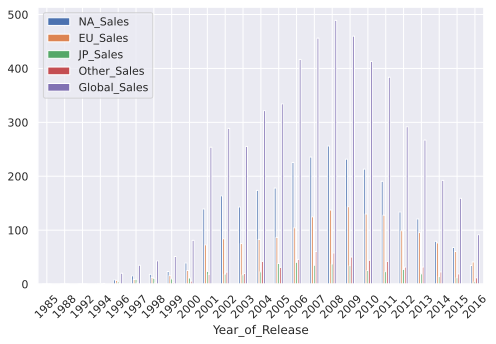

In [9]:
# Plot of video games sales by country and year
df[[x for x in df.columns if "Sales" in x] + ["Year_of_Release"]].groupby(
    "Year_of_Release"
).sum().plot(kind="bar", rot=45)

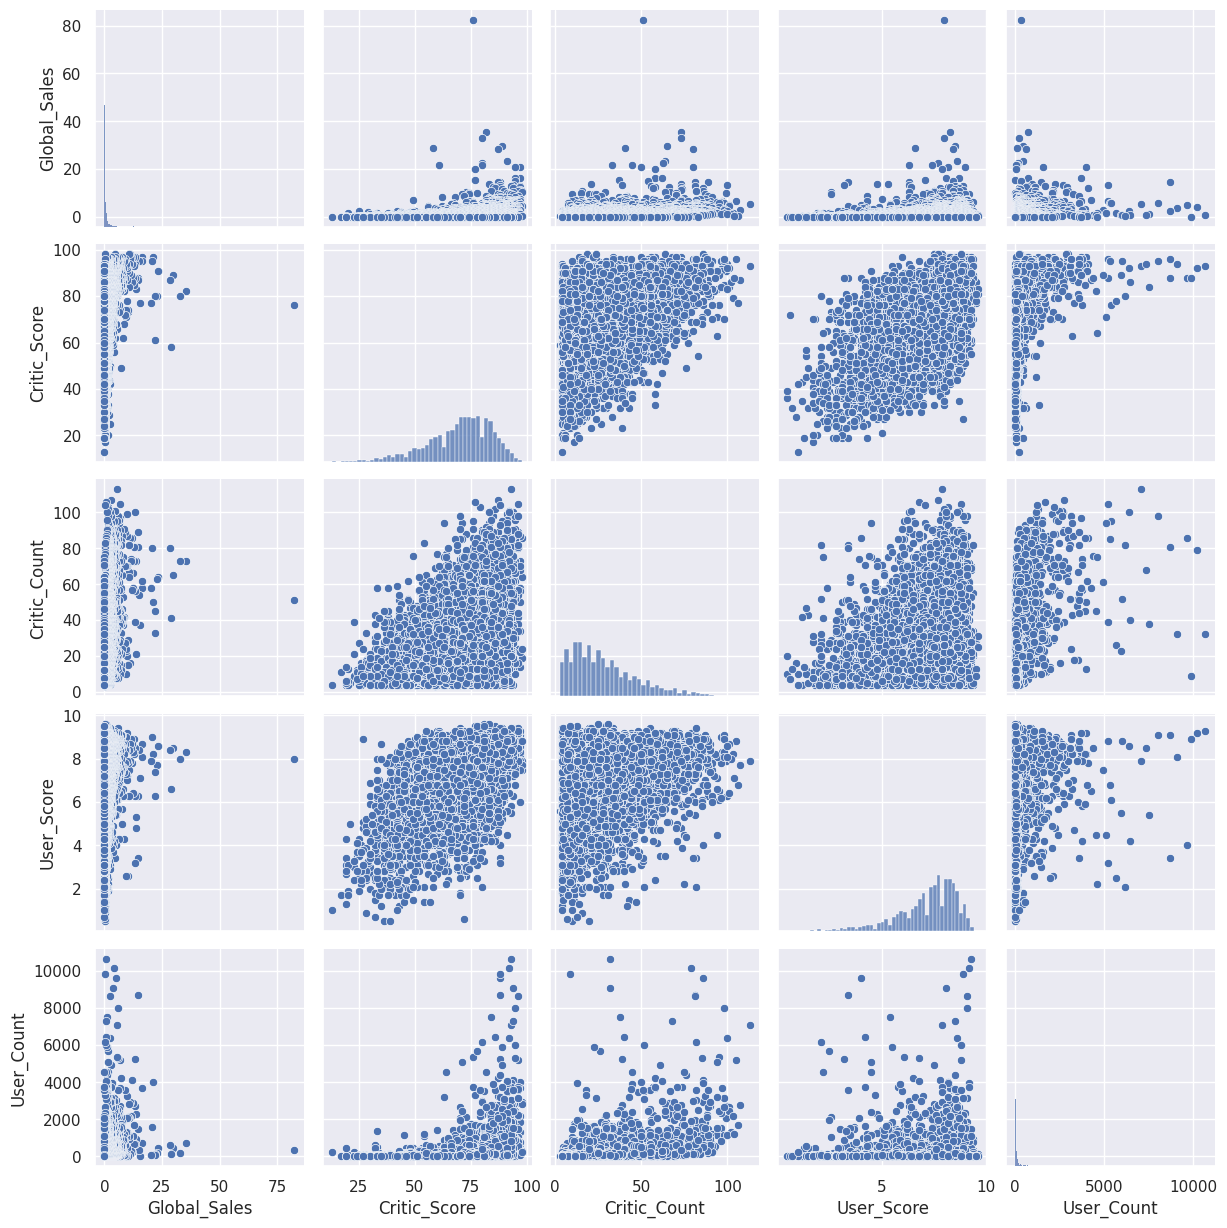

In [10]:
# Pairplot -> pairwise relationship plot
# visualize the relationship between different variables

%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[["Global_Sales", "Critic_Score", "Critic_Count", "User_Score", "User_Count"]]
);

<ipython-input-14-33bb9d2a0c25>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["User_Score"]);


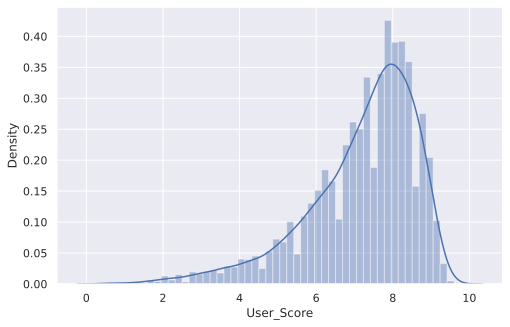

In [14]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df["User_Score"]);

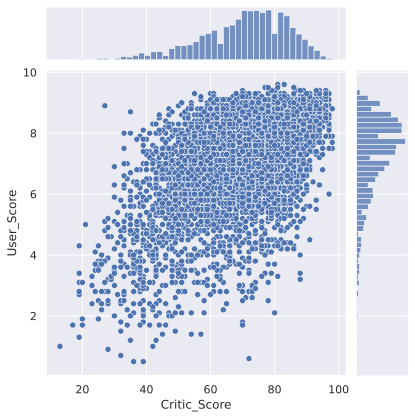

In [13]:
sns.jointplot(x="Critic_Score", y="User_Score", data=df, kind="scatter")

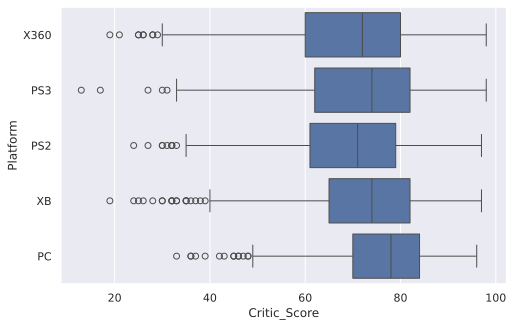

In [22]:
# Compare critic ratings for the top 5 biggest gaming plataforms
top_platforms = (
    df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values
)
sns.boxplot(
    y="Platform",
    x="Critic_Score",
    data=df[df["Platform"].isin(top_platforms)],
    orient="h",
);

<Axes: xlabel='Genre', ylabel='Platform'>

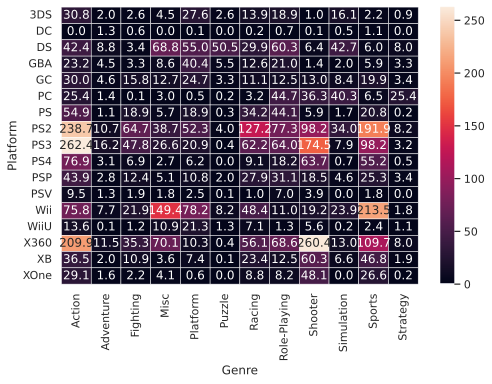

In [34]:
# Heatmap -> distribution of numerical variables over two cotegorical ones
# Total sales of games by genre and gaming platform
platform_genre_sales = (
    df.pivot_table(
        index="Platform", columns="Genre", values="Global_Sales", aggfunc=sum
    )
    .fillna(0)
    .applymap(float)
)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=0.5)

In [35]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
from IPython.display import display, IFrame

init_notebook_mode(connected=True)

def plotly_depict_figure_as_iframe(fig, title="", width=800, height=500,
  plot_path='../../_static/plotly_htmls/'):
  """
  This is a helper method to visualizae PLotly plots as Iframes in a Jupyter book.
  If you are running `jupyter-notebook`, you can just use iplot(fig).
  """

  # in a Jupyter Notebook, the following should work
  #iplot(fig, show_link=False)

  # in a Jupyter Book, we save a plot offline and then render it with IFrame
  fig_path_path = f"{plot_path}/{title}.html"
  plot(fig, filename=fig_path_path, show_link=False, auto_open=False);
  display(IFrame(fig_path_path, width=width, height=height))

In [40]:
# (line plot) number of games released and their sales by year.
years_df = (
    df.groupby("Year_of_Release")[["Global_Sales"]]
    .sum()
    .join(df.groupby("Year_of_Release")[["Name"]].count())
)
years_df.columns = ["Global_Sales", "Number_of_Games"]
years_df

,Global_Sales,Number_of_Games
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7
1997,35.01,13
1998,43.18,25
1999,51.17,30
2000,81.24,102


In [43]:
# Create a line (trace) for the global sales
trace0 = go.Scatter(x=years_df.index, y=years_df["Global_Sales"], name="Global Sales")
# Create a line (trace) for the number of games released
trace1 = go.Scatter(
    x=years_df.index, y=years_df["Number_of_Games"], name="Number of games released"
)

# Define the data array
data = [trace0, trace1]

# Set the title
layout = {"title": "Statistics for video games"}

# Create a Figure and plot it
fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

In [45]:
data = []

# Create a box trace for each genre in our dataset
for genre in df.Genre.unique():
    data.append(go.Box(y=df[df.Genre == genre].Critic_Score, name=genre))

# Visualize
# in a Jupyter Notebook, the following should work
iplot(data, show_link=False)

### Exercises

Problem: Predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

* Preliminary data analysis

In [2]:
# Import all required modules
# Disable warnings
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

# Import plotting modules and set up
import seaborn as sns

sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [140]:
# Tune the visual settings for figures in `seaborn`
# sns.set_context(
#     "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
# )

from matplotlib import rcParams

In [4]:
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")
print("Dataset size: ", df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


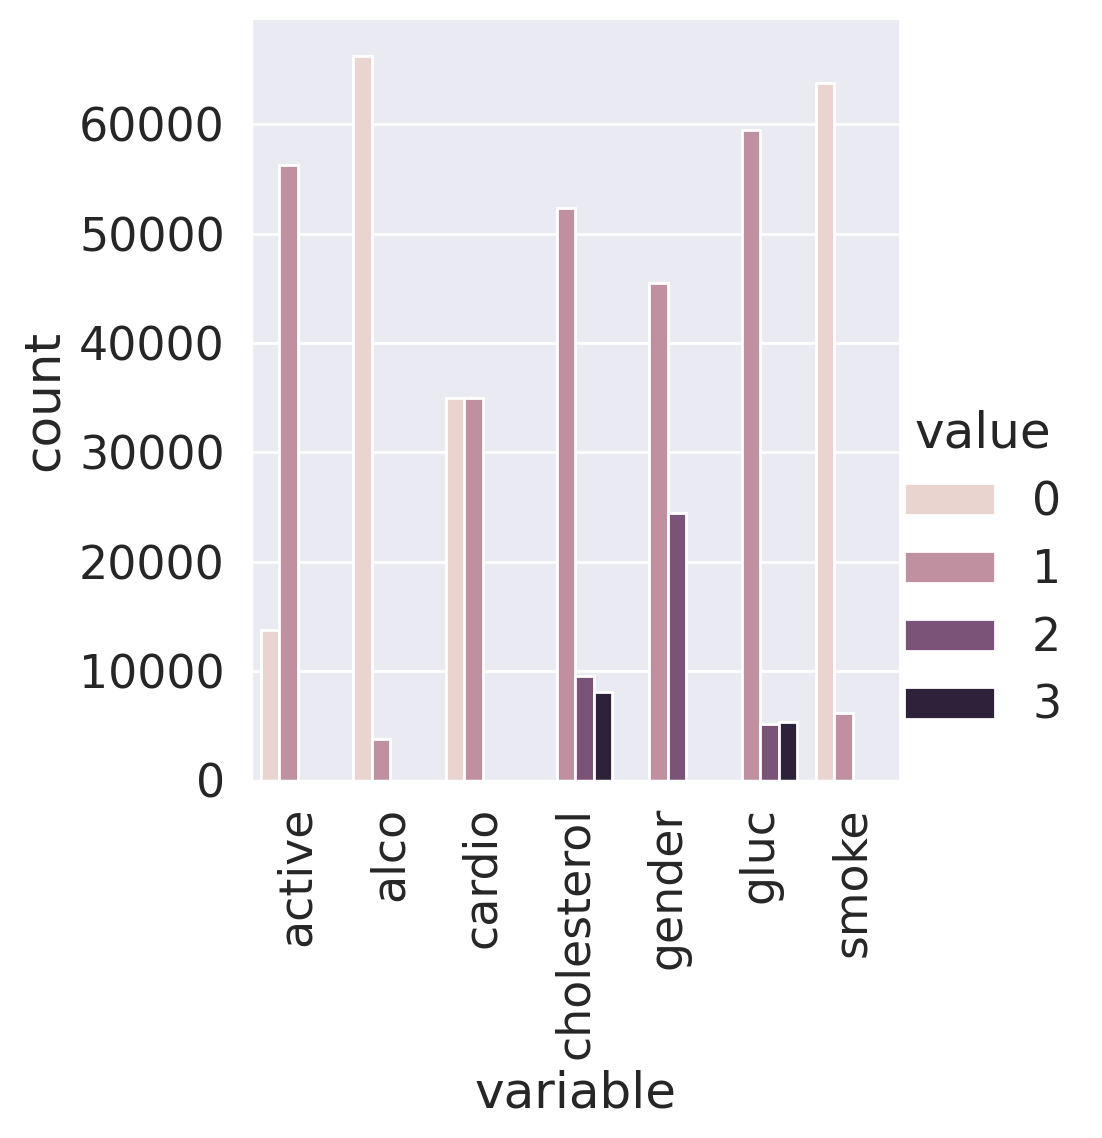

In [118]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)

sns.catplot(
    x="variable", y="count", hue="value", data=df_uniques, kind="bar"
)
plt.xticks(rotation='vertical');

       variable  value  cardio  count
0        active      0       0   6378
1        active      0       1   7361
2        active      1       0  28643
3        active      1       1  27618
4          alco      0       0  33080
5          alco      0       1  33156
6          alco      1       0   1941
7          alco      1       1   1823
8   cholesterol      1       0  29330
9   cholesterol      1       1  23055
10  cholesterol      2       0   3799
11  cholesterol      2       1   5750
12  cholesterol      3       0   1892
13  cholesterol      3       1   6174
14       gender      1       0  22914
15       gender      1       1  22616
16       gender      2       0  12107
17       gender      2       1  12363
18         gluc      1       0  30894
19         gluc      1       1  28585
20         gluc      2       0   2112
21         gluc      2       1   3078
22         gluc      3       0   2015
23         gluc      3       1   3316
24        smoke      0       0  31781
25        sm

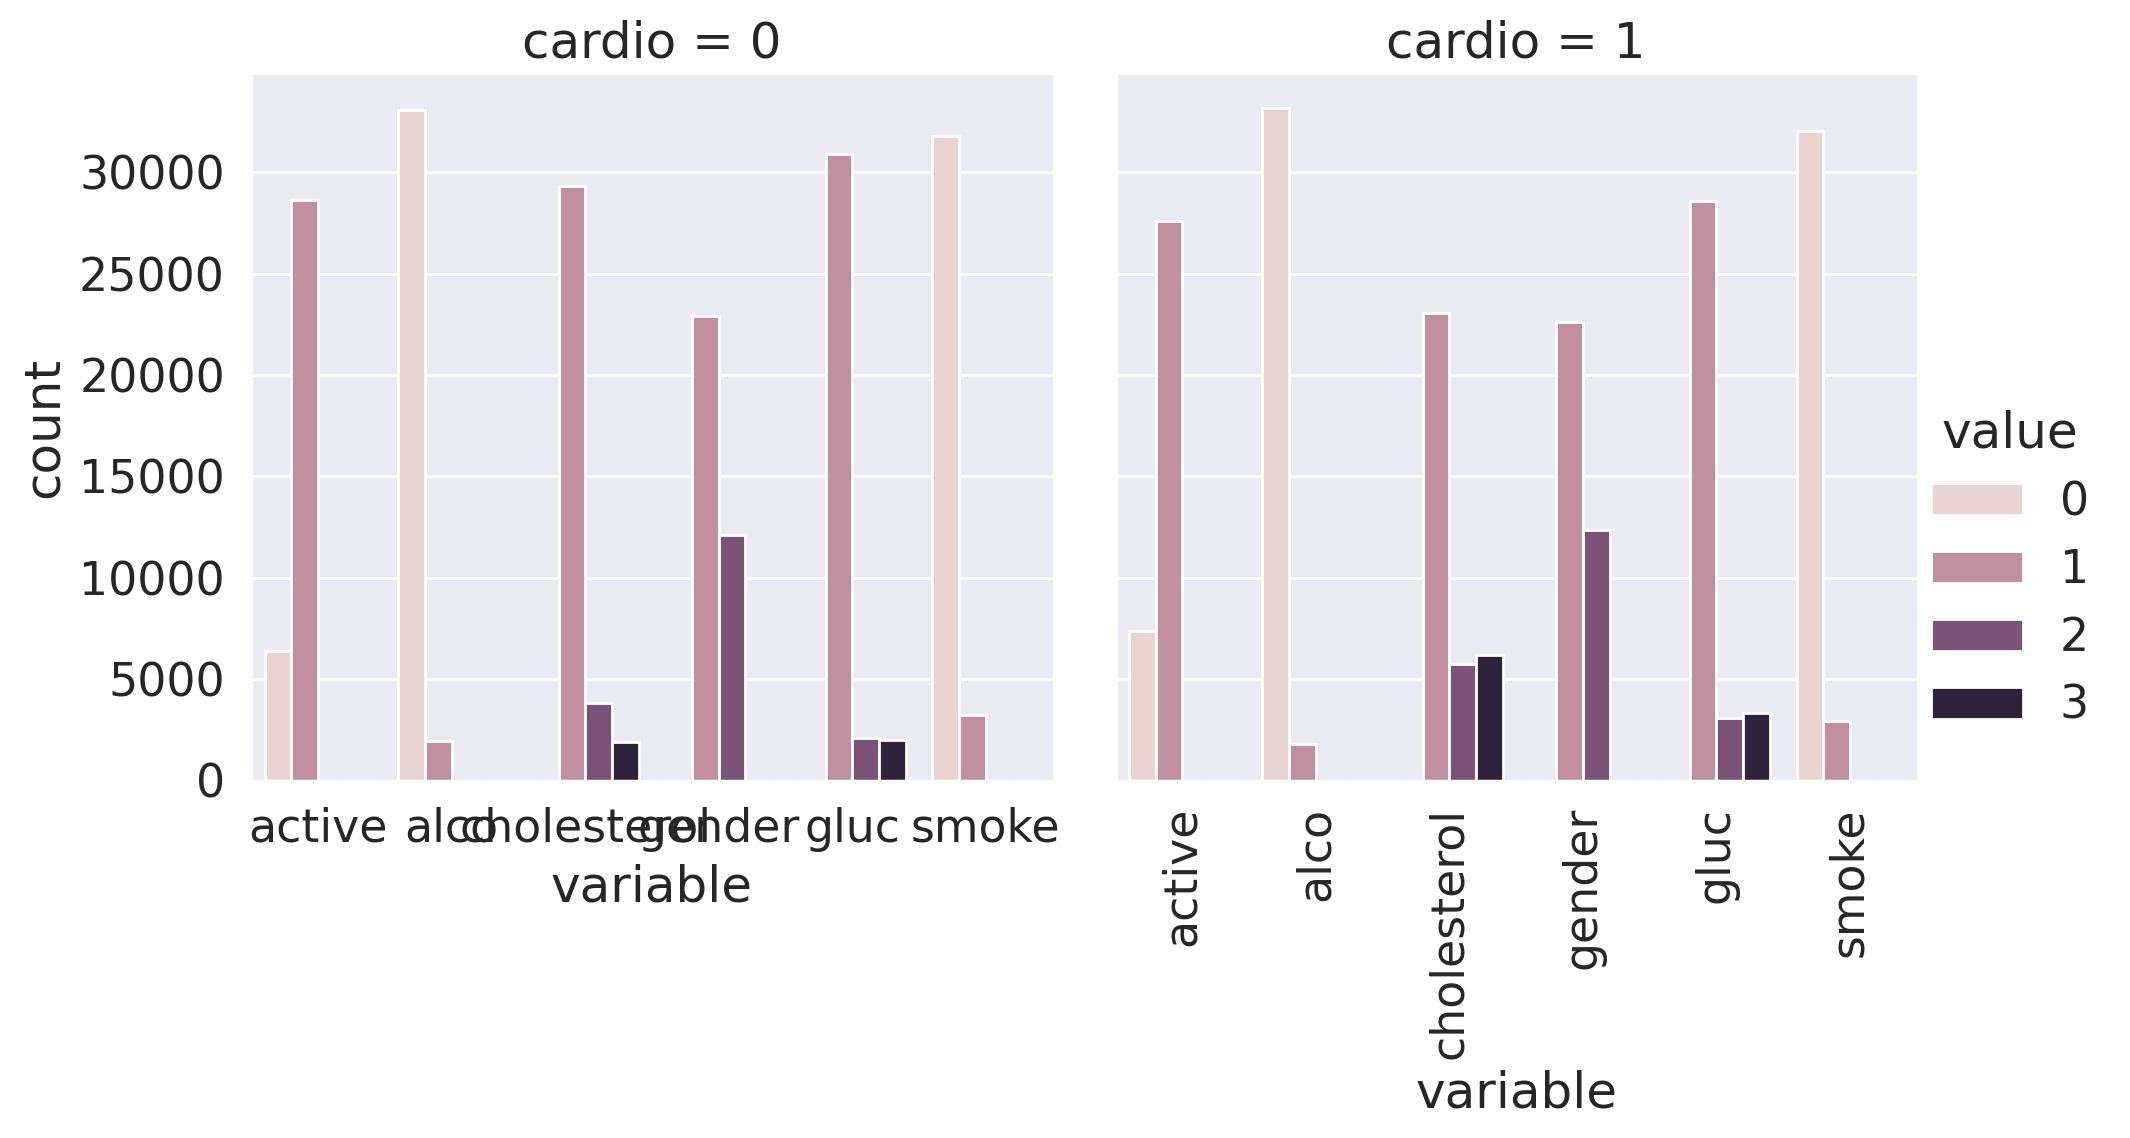

In [78]:
df_uniques = pd.melt(
    frame=df,
    value_vars=["gender", "cholesterol", "gluc", "smoke", "alco", "active"],
    id_vars=["cardio"],
)
df_uniques = (
    pd.DataFrame(df_uniques.groupby(["variable", "value", "cardio"])["value"].count())
    .sort_index(level=[0, 1])
    .rename(columns={"value": "count"})
    .reset_index()
)
sns.catplot(
    x="variable",
    y="count",
    hue="value",
    col="cardio",
    data=df_uniques,
    kind="bar",
)
plt.xticks(rotation='vertical');
print(df_uniques)

In [7]:
for c in df.columns:
  n = df[c].nunique() # numero de elementos unicos
  print(c)
  if n <= 3:
    print(n, sorted(df[c].value_counts().to_dict().items()))
  else:
    print(n)
  print(10 * "-")

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


#### Basic observations

Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether “1” stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.   

* **45530 women and 24470 men** (1=mulher, 2=homem)
* 45530 men and 24470 women
* 45470 women and 24530 men
* 45470 men and 24530 women



In [170]:
df.groupby("gender")["height"].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Question 1.2. (1 point). Who more often report consuming alcohol – men or women?

* women
* **men**


   gender  alco     id
0       1     0  44369
1       1     1   1161
2       2     0  21867
3       2     1   2603


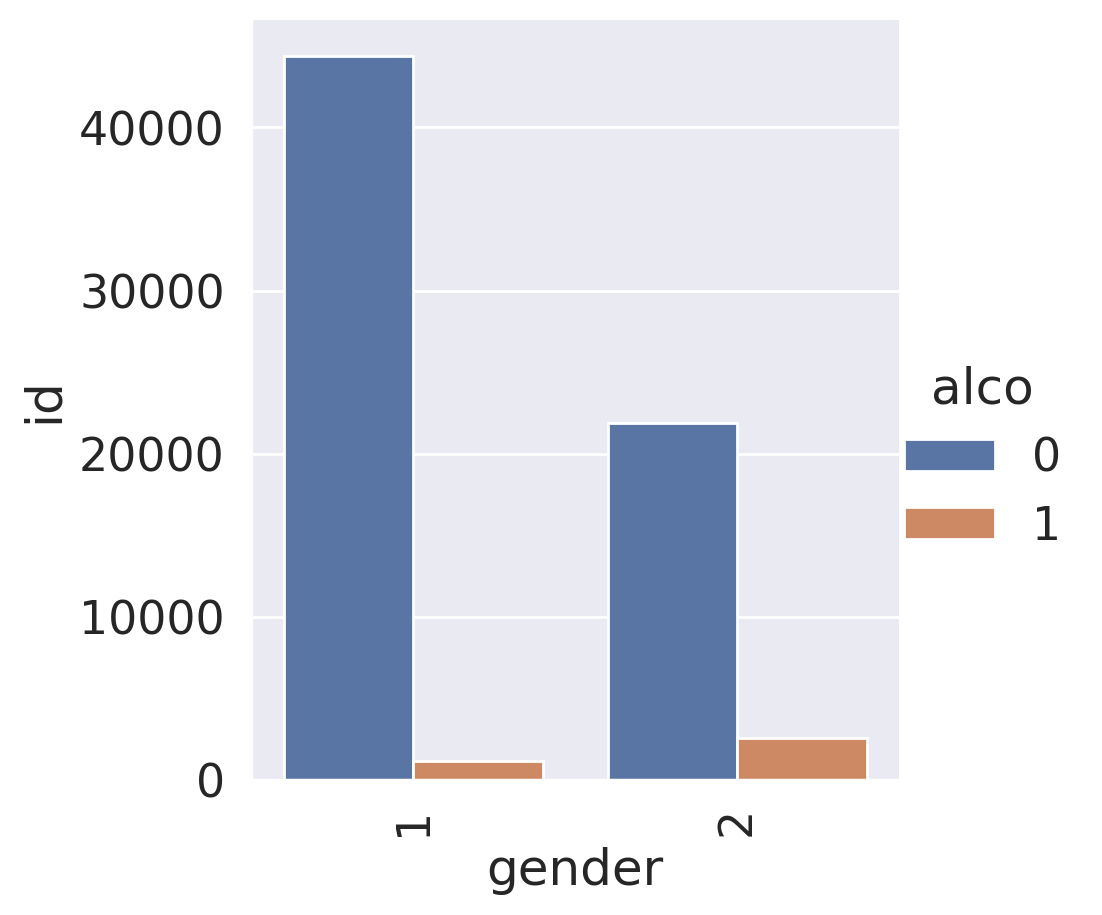

In [171]:
alco = df.groupby(["gender", "alco"]).count()["id"].reset_index()
sns.catplot(
    x="gender",
    y="id",
    data=alco,
    kind="bar",
    hue="alco",
)
plt.xticks(rotation='vertical');
print(alco)

Question 1.3. (1 point). What’s the rounded difference between the percentages of smokers among men and women?

* 4
* 16
* **20**
* 24


gender      1      2
smoke               
0       44717  19114
1         813   5356


([<matplotlib.patches.Wedge at 0x7b2a239cfee0>,
 [Text(-0.8500259100690493, 0.6981804581992286, 'Non smoker'),
  Text(0.8500259754374172, -0.6981803786140567, 'Smoker')],
 [Text(-0.4636504964012995, 0.38082570447230646, '78%'),
  Text(0.463650532056773, -0.38082566106221266, '22%')])

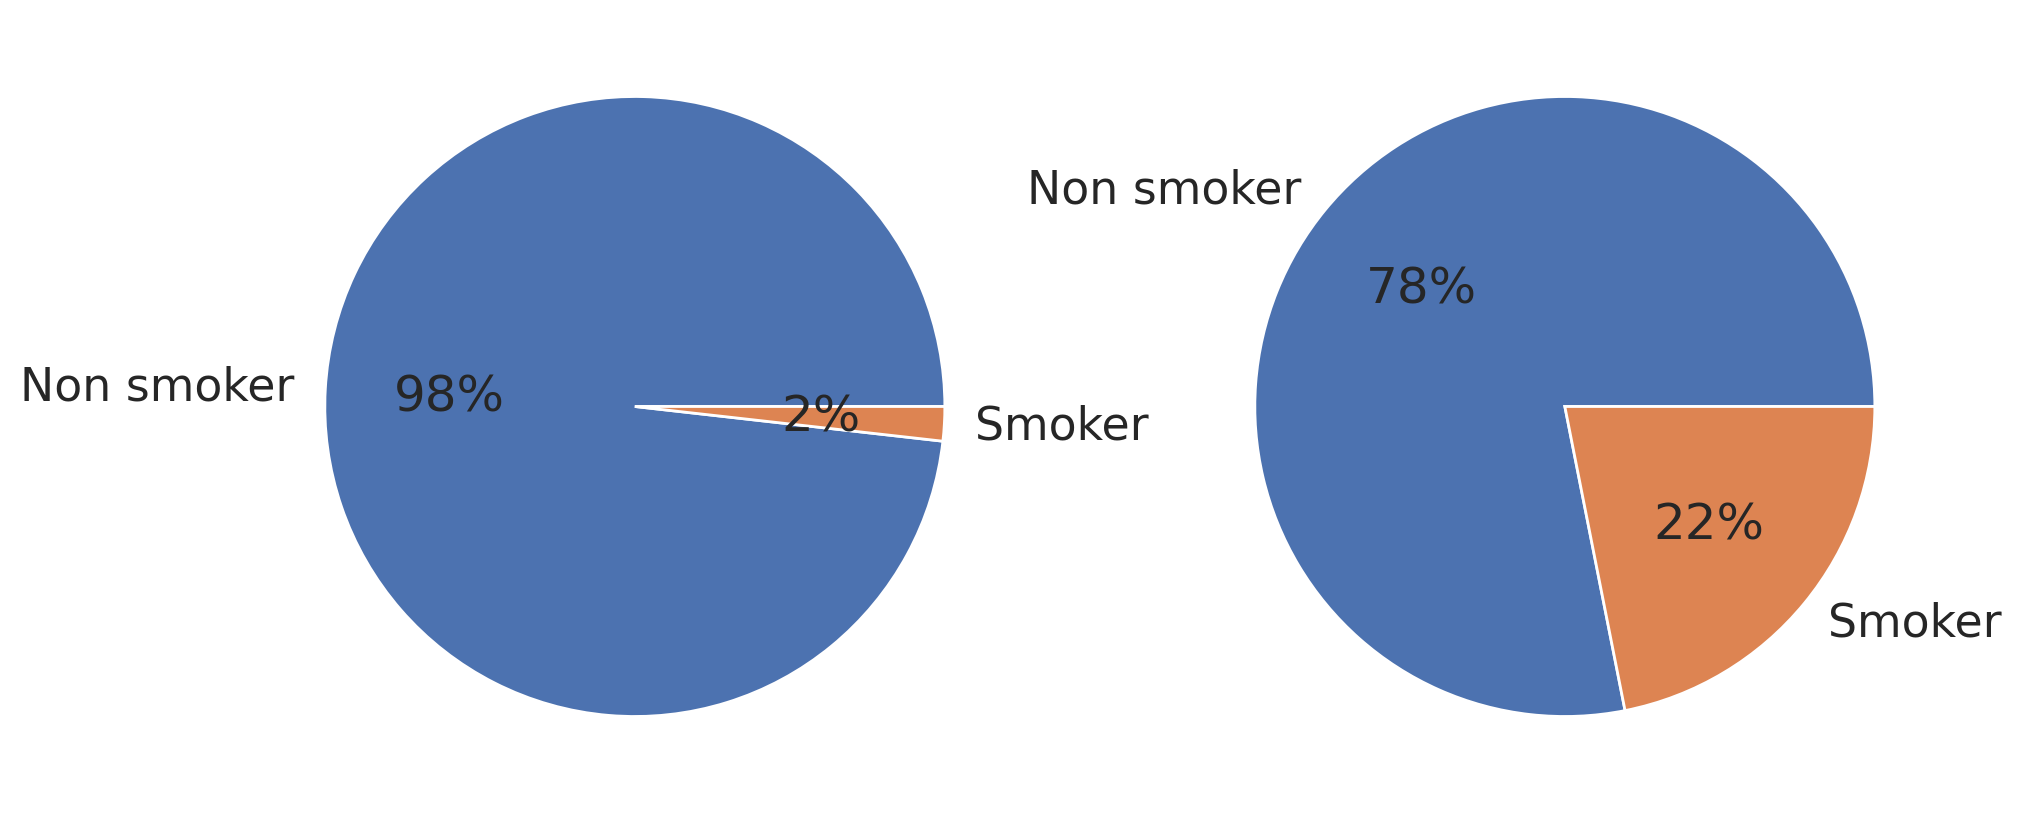

In [143]:
smokers = pd.crosstab(df["smoke"], df["gender"])
print(smokers)
plt.subplot(1, 2, 1)
plt.pie(smokers[1], labels=["Non smoker", "Smoker"], autopct='%.0f%%')
plt.subplot(1, 2, 2)
plt.pie(smokers[2], labels=["Non smoker", "Smoker"], autopct='%.0f%%')

Question 1.4. (1 point). What’s the rounded difference between median values of age (in months) for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

* 5
* 10
* 15
* **20**


In [169]:
def days_to_month(weeks):
  return (weeks/365) * 12

smoke_age = df.groupby("smoke")["age"].median()
days_to_month(smoke_age[0]) - days_to_month(smoke_age[1])

19.627397260273938

#### Risk maps

In [172]:
df["age_years"] = (df["age"] / 365.25).round().astype("int")

In [174]:
df["age_years"].max()

65

Clarifications:

  Calculate age_years feature – rounded age in years. For this task, select people aged from 60 to 64 inclusive.

  Cholesterol level categories in the figure and in our data are different. In the figure, the values of cholesterol feature are as follows: 4 mmol/l -> 1, 5-7 mmol/l -> 2, 8 mmol/l -> 3.

Question 1.5. (2 points). Calculate fractions of ill people (with CVD) in the two groups of people described in the task. What’s the ratio of these two fractions?

In [193]:
smoke_old_men = df[
    (df["gender"] == 2)
    & (df["age_years"] <= 65)
    & (df["age_years"] > 60)
    & (df["smoke"] == 1)
]

# grupo 1 -> systolic pressure is less than 120.
ill_people_g1 = smoke_old_men[
    (smoke_old_men["ap_hi"] < 120) & (smoke_old_men["cholesterol"] == 1)
]["cardio"].mean() # media dos valores resulta na porcentagem, pois são 1 e 0
print(ill_people_g1)

# grupo 2 -> pressure in the interval [160,180).
ill_people_g2 = smoke_old_men[
    (smoke_old_men["cholesterol"] == 3)
    & (smoke_old_men["ap_hi"] >= 160)
    & (smoke_old_men["ap_hi"] < 180)
]["cardio"].mean() # media dos valores resulta na porcentagem, pois são 1 e 0
print(ill_people_g2)

0.2564102564102564
0.9090909090909091


#### Analyzing BMI

Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilograms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.

In [197]:
df["bmi"] = df["weight"] / ((df["height"]/100) ** 2)
df["bmi"]

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Name: bmi, Length: 70000, dtype: float64

Question 1.6. (2 points). Choose the correct statements:

  * Median BMI in the sample is within boundaries of normal values.

  * **Women’s BMI is on average higher then men’s.**

  * Healthy people have higher median BMI than ill people.

  * **In the segment of healthy and non-drinking men BMI is closer to the norm than in the segment of healthy and non-drinking women**


In [198]:
df['bmi'].mean()

27.55651255127886

In [207]:
print("Woman:")
print(df[df["gender"] == 1]["bmi"].mean())
print("Men:")
print(df[df["gender"] == 2]["bmi"].mean())

Woman:
27.98758344183285
Men:
26.754442357289356


In [210]:
healthy_bmi = df[df["cardio"] == 0]["bmi"].mean()
not_healthy_bmi = df[df["cardio"] == 1]["bmi"].mean()
print(f"Healthy: {healthy_bmi}")
print(f"Not Healthy: {not_healthy_bmi}")

Healthy: 26.5481752067945
Not Healthy: 28.56606062701535


In [212]:
healthy_non_drinking_men = df[
    (df["cardio"] == 0)
    & (df["gender"] == 2)
    & (df["alco"] == 0)
]["bmi"].mean()

healthy_non_drinking_woman = df[
    (df["cardio"] == 0)
    & (df["gender"] == 1)
    & (df["alco"] == 0)
]["bmi"].mean()

print(healthy_non_drinking_men)
print(healthy_non_drinking_woman)

25.87263807546017
26.845406594131507
